In [40]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import random
from math import cos, sin

In [41]:
# n_in, n_h, n_out, batch_size = 10, 5, 1, 10


In [42]:
def train(x,y,model,crit):
    for epoch in range(1000):
        y_pred = model(x)

        #get loss
        loss = crit(y_pred,y)
#         print('epoch: ', epoch,' loss: ', loss.item())

        #zero grad
        optimizer.zero_grad()

        #back pass
        loss.backward()
        #update params
        optimizer.step()



In [43]:
def pred(model,x):
    return model(torch.FloatTensor(x)).tolist()



def rand_points():
    x_points = np.linspace(0,10,200)
    y_points = np.linspace(0,10,200)
    points = [[x,y] for x in x_points for y in y_points]
    return points

def train_vals(x):
    return ([z[0] for z in x.tolist()],[z[1] for z in x.tolist()])



def plot_regions(x,y,model):
    x_train,y_train = train_vals(x)
    points = rand_points()
    x_map = [x[0] for x in points]
    y_map = [x[1] for x in points]
    preds = pred(model,points)
    
    
    #get colors
    c1 = ['g','b']
    c2 = ['#E2E79F','#FF90FF']
    
    train_map = [c1[int(x[0])] for x in y.tolist()]
    cmap = [c2[0] if x[0] < 0.5 else c2[1] for x in preds]
    #plot points
    plt.scatter(x_map,y_map,color=cmap)
    plt.scatter(x_train,y_train,color=train_map,marker='o')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    #show classification regions
    plt.show()
    
    

    
    

Underparameterize


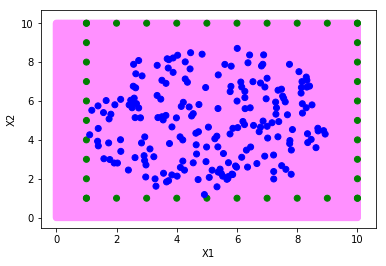

Overparameterize


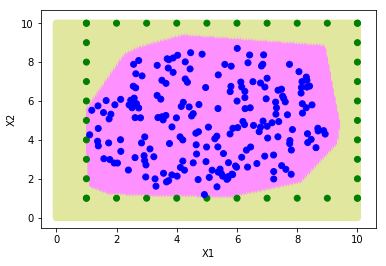

In [44]:
d = 2


#get data for new model
x1 = []
for z in range(1,11):
    x1.append([z,1])
    x1.append((1,z))
    x1.append((10,z))
    x1.append((z,10))
y1 = [[0] for x in range(len(x1))]
x2 = []
y2 = []
for z in range(200):
    r = 4 * (random.random() ** 0.5)
    theta = random.random() * 2 * 3.14159
    x = 5 + r * cos(theta)
    y = 5 + r * sin(theta)
    x2.append([x,y])
    y2.append([1])

x = x1 + x2
y = y1 + y2





x = torch.FloatTensor(x)
y = torch.FloatTensor(y)



print("Underparameterize")
H = 3
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
train(x,y,model,crit)
plot_regions(x,y,model)



print("Overparameterize")
H = 20
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
train(x,y,model,crit)
plot_regions(x,y,model)
    

Underparameterize


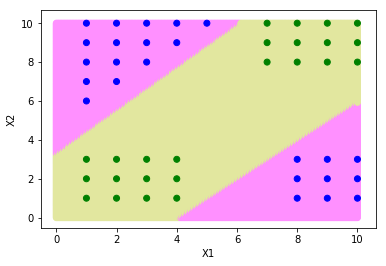

Overparameterize


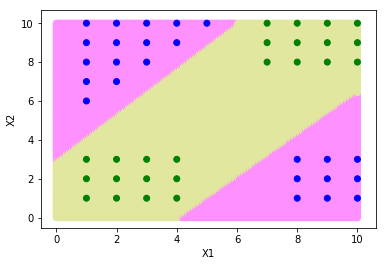

In [45]:

def load_data(file):
    x = []
    y = []
    with open(file) as f:
        for l in f:
            vals = [int(x) for x in l.split()]
            if vals == []:
                break
            x.append([vals[0],vals[1]])
            if vals[2] == 0 or vals[2] == 3:
                y.append([0])
            else:
                y.append([1])
    return x,y

x,y = load_data('data0.txt')
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)


H = 3
print("Underparameterize")
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train(x,y,model,crit)
plot_regions(x,y,model)
    

H = 10
print("Overparameterize")

model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train(x,y,model,crit)
plot_regions(x,y,model)
    

In [ ]:
#how many different local optima are found?
#local optima are diff if different classification
# of training data
# decision boundry will be different every time, so it
# is not a  good measure

#also figure out how the weights are spread out
#visualize weights in relation to each other

#4 syntehtic data sets


#NN spread out weights

#look at SGD vs Adam

